In [9]:
# load libraries
library(Seurat)
library(ggplot2)
library(sctransform)

## Create Seurat object

In [10]:
cts_matrix <- Read10X_h5(filename="/Users/stevennguyen/Projects/scrnaseq-analysis/data/raw/Breast_Cancer_3p_raw_feature_bc_matrix.h5")

idc <- CreateSeuratObject(counts= cts_matrix,
               project = "idc_65f",
               min.cells = 3,
               min.features = 200)
idc

An object of class Seurat 
22914 features across 5621 samples within 1 assay 
Active assay: RNA (22914 features, 0 variable features)
 1 layer present: counts

## QC pre processing

In [11]:
# percent mitochondrial reads
idc[["percent.mt"]] <- PercentageFeatureSet(idc, pattern = "^MT-")
View(idc@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGCAGTCTT-1,idc_65f,584,252,22.94520548
AAACCCAAGCGACTGA-1,idc_65f,365,215,10.95890411
AAACCCAAGGGCAGAG-1,idc_65f,291,202,0.00000000
AAACCCAGTACTCCGG-1,idc_65f,32596,3901,13.88207142
AAACCCAGTCGTCATA-1,idc_65f,49372,6058,4.83674957
AAACCCATCCTTCTTC-1,idc_65f,7166,2077,3.89338543
AAACCCATCGCCCAGA-1,idc_65f,711,389,0.70323488
AAACGAAAGCTCGCAC-1,idc_65f,44434,4984,3.35328802
AAACGAAAGGTAATCA-1,idc_65f,10948,3456,2.17391304


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


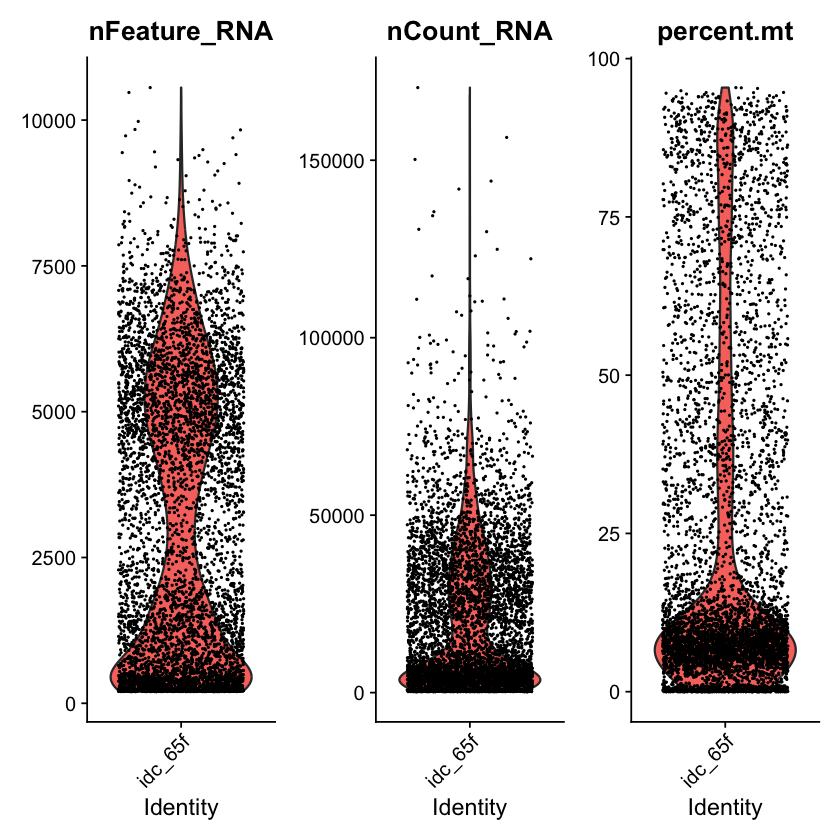

In [12]:
# Visualize QC metrics as a violin plot
VlnPlot(idc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

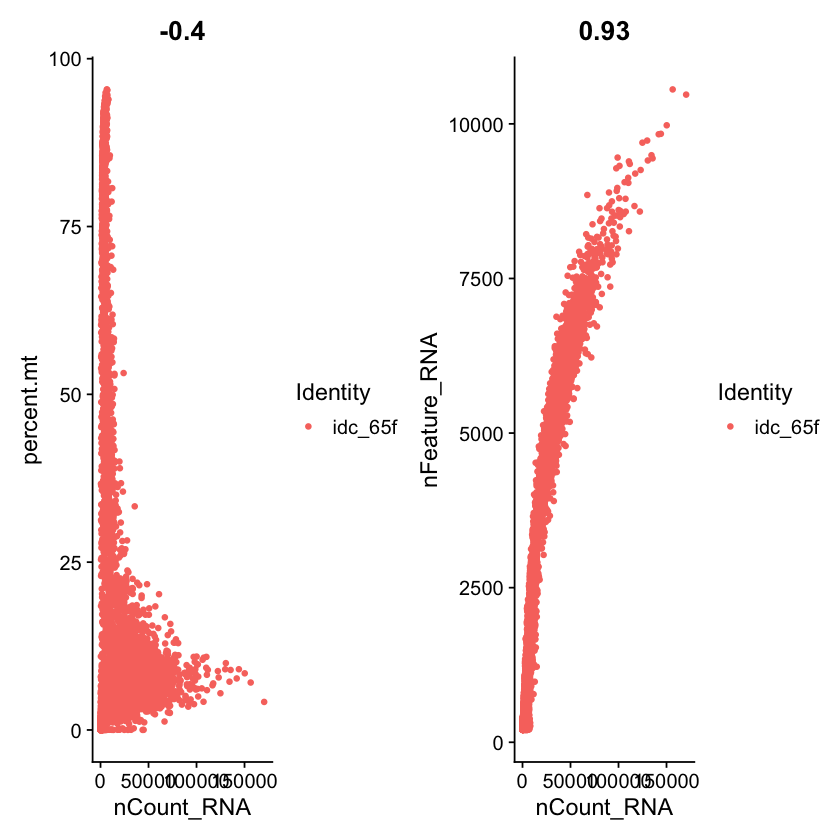

In [13]:
plot1 <- FeatureScatter(idc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(idc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [14]:
# filter out low quality cells 
idc <- subset(idc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
idc

An object of class Seurat 
22914 features across 783 samples within 1 assay 
Active assay: RNA (22914 features, 0 variable features)
 1 layer present: counts

In [24]:
print("Saving filtered Seurat object...")
setwd("/Users/stevennguyen/Projects/scrnaseq-analysis")
saveRDS(idc, "data/processed/idc_filtered.rds")

qc_summary <- data.frame(
    original_cells <- 5621,
    filtered_cells <- ncol(idc),
    filtered_features <- nrow(idc))

write.csv(qc_summary, "results/qc_summary.csv")
    

[1] "Saving filtered Seurat object..."
